## Problem1 

注：把开学他给的文件包里的Utils.py 和这个notebook放到一个目录底下从而方便improt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Utils import timeout


# Problem 1: Rejection Sampling and Monte Carlo Integration

Maximum Points: 14

### Task 1 [4p]
Fill in the remaining part of the function `problem1_inversion` to produce samples from the given distribution using rejection sampling:

$$
F[x] =
\begin{cases} 
0, & x \leq 0 \\
\frac{e^{x^2-1}}{e-1}, & 0 < x < 1 \\
1, & x \geq 1
\end{cases}
$$

### Task 2 [2p]
Produce **100,000 samples** (use fewer if it times out) from the above distribution and store them in `problem1_samples`. Plot the histogram of the samples together with the true density.

### Task 3 [2p]
Using the 100,000 samples from `problem1_samples`, compute the approximate value of the integral:

$$
\int_0^1 \frac{\sin(x)}{2e^{x^2}x} e^{-1} \,dx
$$

Store the result in `problem1_integral`.

### Task 4 [2p]
Use Hoeffding's inequality to produce a **95% confidence interval** for the above integral. Store the result as a tuple in `problem1_interval`.

### Task 5 [4p]
Fill in the remaining part of the function `problem1_inversion_2` to produce samples from the given distribution using rejection sampling:

$$
F[x] =
\begin{cases} 
0, & x \leq 0 \\
20x e^{20-1/x}, & 0 < x < 1 \\
1, & x \geq 1
\end{cases}
$$

**Hint:** This is tricky. Choosing the wrong sampling distribution might lead to a rejection rate of at least 90%. Aim to create **100,000 samples within 2 seconds**.

---

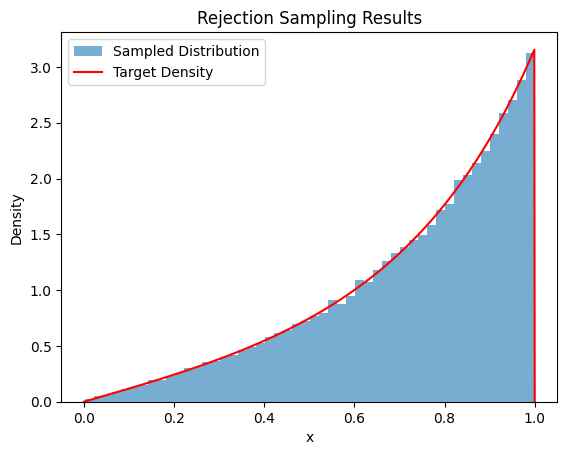

In [9]:
# Part 1
import numpy as np
from Utils import timeout
import matplotlib.pyplot as plt

@timeout(seconds=10)
def problem1_inversion(n_samples=1):
# Distribution from part 1
# write the code in this function to produce samples from the distribution in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary rejections
# Return a numpy array of length n_samples
    """
    使用拒绝采样法从给定分布生成样本。
    """
    def target_pdf(x):
        """
        目标概率密度函数 p(x)。
        也可以用 lambda 表达式来写
        """
        return 2*x*np.exp(x*x)/(np.e-1)
        # 返回 p(x)  # 给定的概率密度函数

    def proposal_pdf(x):
        """
        提议分布 q(x)：均匀分布。
        我们通常在给定区间上使用均匀分布，
        或者选择某种 Beta 分布使得更容易被接受
        （实际上，我们选择具有厚尾的分布）
        """
        return 1  # 在 x 范围内的均匀分布

    # 拒绝采样的参数
    M = 2*np.e/(np.e-1)  # 缩放常数，基于最大比值 p(x) / q(x) 选择，M 越接近该比值，接受的概率越大
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # 从均匀分布中采样
        u = np.random.uniform(0, M * proposal_pdf(x))  # 用于接受的均匀随机数

        if u <= target_pdf(x):  # 是否接受样本
            samples.append(x)
        count += 1

    return np.array(samples)

# 生成样本
num_samples = 100000
samples = rejection_sampling(num_samples)

# 绘制生成的样本分布和目标分布
x = np.linspace(0, 1, 1000)
y = [target_density(xi) for xi in x]

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Distribution')
plt.plot(x, y, label='Target Density', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Results')
plt.show()


In [11]:
# 1.6.3
import numpy as np

# 定义 g(x) = sin(x)
def g(x):
    return np.sin(x)

# 从 problem1_samples 中近似计算积分
def monte_carlo_integration(samples):
    # 计算 g(x) 的值
    g_values = g(np.array(samples))
    
    # 求平均值，近似积分
    integral = np.mean(g_values)
    return integral

# 假设前面生成了 100000 个样本 problem1_samples
# 从均匀分布 [0, 1] 中生成一些样本作为测试（实际中应替换为你的采样结果）
# Part 2
problem1_samples = problem1_inversion(n_samples=10000)



Theory for part 3:
$\mathbb{E}[g(x)]=\int_D sin(x)p(x)dx$, if $x \in D$ and x's probability density fuction is $p(x) $
So we use $\frac{1}{n}\sum_i sin(x_i)$ to estimate$\mathbb{E}[g(x)]$

In [3]:
# 计算积分
problem1_integral = monte_carlo_integration(problem1_samples)
print("近似积分值为:", problem1_integral)


近似积分值为: 0.6527518656202334


In [4]:
# 1.6.4
# error
import numpy as np

# 假设你已经计算了 problem1_integral 的值和样本数量 n
n = 100000  # 样本数量

# Hoeffding's 不等式参数
M = 1  # 采样分布范围，假设在 [0, 1] 之间，则 M = b-a = 1
confidence_level = 0.95

# 根据 Hoeffding's 不等式计算 ε
epsilon = np.sqrt((M**2 * np.log(2 / (1 - confidence_level))) / (2 * n))
print("ε 的值为:", epsilon)
# 构造 95% 的置信区间
lower_bound = problem1_integral - epsilon
upper_bound = problem1_integral + epsilon

# 将结果存储为 tuple
problem1_interval = (lower_bound, upper_bound)

# 打印结果
print("95% 置信区间为:", problem1_interval)


ε 的值为: 0.004294694083467375
95% 置信区间为: (np.float64(0.648457171536766), np.float64(0.6570465597037007))


I choose a wrong distribution function and can not figure out a better one

Computed c: 55.971202630989595
Iterations: 1000, Samples: 11
Iterations: 2000, Samples: 32
Iterations: 3000, Samples: 47
Iterations: 4000, Samples: 59
Iterations: 5000, Samples: 78
Iterations: 6000, Samples: 95
Iterations: 7000, Samples: 114
Iterations: 8000, Samples: 142
Iterations: 9000, Samples: 171
Iterations: 10000, Samples: 193
Iterations: 11000, Samples: 210
Iterations: 12000, Samples: 225
Iterations: 13000, Samples: 239
Iterations: 14000, Samples: 252
Iterations: 15000, Samples: 275
Iterations: 16000, Samples: 304
Iterations: 17000, Samples: 315
Iterations: 18000, Samples: 333
Iterations: 19000, Samples: 355
Iterations: 20000, Samples: 375
Iterations: 21000, Samples: 387
Iterations: 22000, Samples: 404
Iterations: 23000, Samples: 419
Iterations: 24000, Samples: 436
Iterations: 25000, Samples: 449
Iterations: 26000, Samples: 463
Iterations: 27000, Samples: 475
Iterations: 28000, Samples: 492
Iterations: 29000, Samples: 498
Iterations: 30000, Samples: 511
Iterations: 31000, Sampl

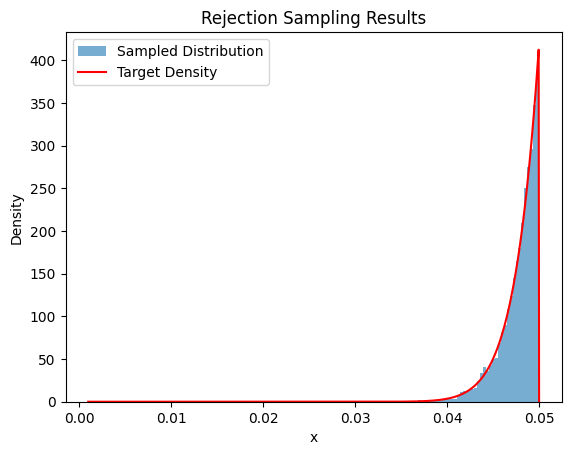

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布的概率密度函数 f(x)
def target_density(x):
    if 0 < x < 1/20:
        return 20 * np.exp(20 - 1/x) * (1 + 1/x)
    return 0

# 定义辅助分布的密度函数 g(x) (指数分布)
def proposal_density(x):
    return 20 * np.exp(-20 * x)  # 指数分布的密度函数

# 计算常数 c (f(x) 的最大值)
def compute_c():
    x_values = np.linspace(0.001, 1/20, 1000)  # 避免 x = 0
    f_values = [target_density(x) for x in x_values]
    g_values = [proposal_density(x) for x in x_values]
    c = max([f / g for f, g in zip(f_values, g_values)])
    print(f"Computed c: {c}")  # 添加调试信息
    return c

# 拒绝采样算法
def rejection_sampling(num_samples):
    c = compute_c()  # 确定常数 c
    samples = []
    iterations = 0  # 添加计数器

    while len(samples) < num_samples:
        iterations += 1
        if iterations % 1000 == 0:
            print(f"Iterations: {iterations}, Samples: {len(samples)}")  # 添加调试信息

        # 从辅助分布（指数分布）生成候选样本
        x = np.random.exponential(1/20)
        if x > 1/20:
            continue  # 跳过超出范围的样本
        u = np.random.uniform(0, c * proposal_density(x))  # 从 [0, c * g(x)] 中生成随机值

        # 计算目标分布的密度值
        f_x = target_density(x)

        # 判断是否接受样本
        if u <= f_x:
            samples.append(x)

    return samples

# 生成样本
num_samples = 10000
samples = rejection_sampling(num_samples)

# 绘制生成的样本分布和目标分布
x = np.linspace(0.001, 1/20, 1000)
y = [target_density(xi) for xi in x]

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Distribution')
plt.plot(x, y, label='Target Density', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Results')
plt.show()

In [12]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")
    
try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")
    
try:
    assert(isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

    
try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval,tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

    
try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Try again. You should return a numpy array from problem1_inversion_2


## Problem 2

把数据放到合适地方再跑！！！！

## Problem 2: Proportional Model for Spam Classification

Let us build a proportional model \( P(Y = 1 | X) = G(\beta_0 + \beta \cdot X) \), where \( G \) is the logistic function, for the spam vs not spam data. Here we assume that the features are presence (1) or absence (0) of a word. Let \( X_1, X_2, X_3 \) denote the presence (1) or absence (0) of the words ("free", "prize", "win").

### **Tasks**
1. **[2p]** Load the file `data/spam.csv` and create two numpy arrays:
   - `problem2_X`: Shape \((n_{\text{emails}}, 3)\), where each column corresponds to \( X_1, X_2, X_3 \).
   - `problem2_Y`: Shape \((n_{\text{emails}},)\), which consists of 1 if the email is spam and 0 otherwise.
   - Split the data into train, calibration, and test sets with proportions 40%, 20%, and 40%, respectively.

2. **[4p]** Implement the final loss function for logistic regression inside the class `ProportionalSpam`. 
   - Use the provided test cell to check the correctness of your loss function on a test point.

3. **[4p]** Train the logistic regression model using the provided training data. Then, use the trained model to predict the calibration data probabilities and calibrate them using a Decision Tree Regressor.

4. **[3p]** Use the trained model and calibrator to make final predictions on the testing data. Store the prediction in `problem2_final_predictions`. Compute the \( 0{-}1 \) test-loss and store it in `problem2_01_loss`. Provide a 99% confidence interval of the test-loss and store it in `problem2_interval` as a tuple.


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None  # 用于存储逻辑回归模型的参数（包括偏置项和权重）
        self.result = None  # 用于存储优化结果
    
    # define the objective/cost/loss function we want to minimise
        # 定义逻辑回归的目标函数（损失函数）
    def loss(self, X, Y, coeffs):
        logits = np.dot(X, coeffs[1:]) + coeffs[0]  # 计算线性组合 z = β0 + β·X
        predictions = 1 / (1 + np.exp(-logits))  # 使用 sigmoid 函数将 z 转换为概率
        # 计算负对数似然损失
        loss_value = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        return loss_value  # 返回损失值


    def fit(self, X, Y):
        from scipy import optimize  # 引入优化工具

        # 定义一个用于最小化损失的目标函数
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_arguments = np.zeros(shape=X.shape[1] + 1)  # 初始化参数为全零（包括偏置项 β0 和权重 β）
        self.result = optimize.minimize(opt_loss, initial_arguments, method='cg')  # 使用共轭梯度法最小化损失函数
        self.coeffs = self.result.x  # 存储优化后的参数

    def predict(self, X):
            if self.coeffs is not None:
                G = lambda x: np.exp(x) / (1 + np.exp(x))  # 定义 sigmoid 函数
                # 根据训练好的参数计算预测概率，并四舍五入到小数点后一位
                return np.round(10 * G(np.dot(X, self.coeffs[1:]) + self.coeffs[0])) / 10

        

df_spam = pd.read_csv("data/spam.csv", encoding='latin')  # 加载数据
df_spam['label'] = df_spam['v1'].apply(lambda x: 1 if x == 'spam' else 0)  # 将标签 "spam" 转换为 1，其余为 0
df_spam['free'] = df_spam['v2'].apply(lambda x: 1 if 'free' in x else 0)  # 特征：是否包含 "free"
df_spam['prize'] = df_spam['v2'].apply(lambda x: 1 if 'prize' in x else 0)  # 特征：是否包含 "prize"
df_spam['win'] = df_spam['v2'].apply(lambda x: 1 if 'win' in x else 0)  # 特征：是否包含 "win"

# 打印列的顺序和对应的索引
print("\n列名和索引顺序：")
for i, col in enumerate(df_spam.columns):
    print(f"列索引 {i}: {col}")

problem3_X = df_spam.iloc[:, 6:9].to_numpy(dtype=np.int64)  # 提取特征列，转换为 NumPy 数组
problem3_Y = df_spam.iloc[:, 5].to_numpy(dtype=np.int64)  # 提取标签列，转换为 NumPy 数组


n_samples = problem3_X.shape[0]


# 随机打乱数据的索引
indices = np.random.permutation(n_samples)

# 计算划分点
train_end = int(0.4 * n_samples)  # 训练集的结束位置（40%）
calib_end = int(0.6 * n_samples)  # 校准集的结束位置（60%）

# 使用切片根据划分点提取数据
train_indices = indices[:train_end]# 0-40%
calib_indices = indices[train_end:calib_end]# 40%-60%
test_indices = indices[calib_end:] #60%-100%

# 划分特征和标签
problem3_X_train = problem3_X[train_indices]
problem3_X_calib = problem3_X[calib_indices]
problem3_X_test = problem3_X[test_indices]

problem3_Y_train = problem3_Y[train_indices]
problem3_Y_calib = problem3_Y[calib_indices]
problem3_Y_test = problem3_Y[test_indices]

print(problem3_X_train.shape,problem3_X_calib.shape,problem3_X_test.shape,problem3_Y_train.shape,problem3_Y_calib.shape,problem3_Y_test.shape)


列名和索引顺序：
列索引 0: v1
列索引 1: v2
列索引 2: Unnamed: 2
列索引 3: Unnamed: 3
列索引 4: Unnamed: 4
列索引 5: label
列索引 6: free
列索引 7: prize
列索引 8: win
(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [10]:

problem3_ps = ProportionalSpam()
problem3_ps.fit(problem3_X_train, problem3_Y_train)


problem3_X_pred = problem3_ps.predict(problem3_X_calib).reshape(-1, 1)

problem3_calibrator = DecisionTreeRegressor()
problem3_calibrator.fit(problem3_X_pred, problem3_Y_calib)

DecisionTreeRegressor()

In [11]:
test_pred_raw = problem3_ps.predict(problem3_X_test).reshape(-1, 1)
problem3_final_predictions = problem3_calibrator.predict(test_pred_raw)

In [12]:
import scipy.stats as stats

# 将校准后的预测概率转换为最终的决策（分类标签）
problem3_final_decisions = (problem3_final_predictions > 0.5).astype(int)

# 计算 0-1 测试损失
problem2_01_loss = np.mean(problem3_Y_test != problem3_final_decisions)

# 计算 99% 的置信区间
n_test = len(problem3_Y_test)  # 测试集样本数
z_value = stats.norm.ppf(0.995)  # 99% 的 z 值
p_hat = problem2_01_loss  # 错误率
margin_of_error = z_value * np.sqrt(p_hat * (1 - p_hat) / n_test)  # 误差范围
problem2_interval = (p_hat - margin_of_error, p_hat + margin_of_error)  # 置信区间

# 打印结果
print(f"0-1 测试损失: {problem2_01_loss:.4f}")
print(f"99% 的置信区间: {problem2_interval}")


0-1 测试损失: 0.1207
99% 的置信区间: (np.float64(0.10290910791547135), np.float64(0.1384547323716529))


In [13]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


## Problem 3

## Problem 3: Markov Chains Analysis

Consider the following four Markov chains. Answer each question for all chains.

### **Tasks**
1. **[2p]** What is the transition matrix?
   - Provide the transition matrix as a numpy array of shape \((n_{\text{states}}, n_{\text{states}})\), where state \(A, B, \ldots\) corresponds to index \(0, 1, \ldots\).

2. **[2p]** Is the Markov chain irreducible?
   - Answer with `True` or `False`.

3. **[3p]** Is the Markov chain aperiodic? What is the period for each state?
   - Answer with `True` or `False` for aperiodicity.
   - Provide the period for each state as a numpy array of shape \((n_{\text{states}},)\).

4. **[3p]** Does the Markov chain have a stationary distribution, and if so, what is it?
   - Answer with `True` or `False`.
   - If the stationary distribution exists, provide it as a numpy array of shape \((n_{\text{states}},)\).

5. **[3p]** Is the Markov chain reversible?
   - Answer with `True` or `False`.



Suppose A for state 0, B for state 1, C for state 2, D for state 3 \
state numbers are also matched with index number

In [14]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd
from scipy.linalg import eig

In [15]:
#转移矩阵
P_A = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.0, 0.0, 0.8,0.2]])

P_B = np.array([[0.0, 0.2, 0.0,0.8],
              [0.0, 0.0, 1.0,0.0],
              [0.0, 1.0, 0.0,0.0],
              [0.5, 0.0, 0.5,0.0]])

P_C = np.array([[0.2, 0.3, 0.0,0.0,0.5],
               [0.2, 0.2, 0.6,0.0,0.0],
              [0.0, 0.4, 0.0,0.6,0.0],
              [0.0, 0.0, 0.0,0.6,0.4],
               [0.0,0.0,0.0,0.4,0.6]])

P_D = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.1, 0.0, 0.7,0.2]])

In [16]:
Ps=[P_A,P_B,P_C,P_D]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_2 is: (5, 5)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_3 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 9
Graph edges with weights:
Edge from 0 to 0, weight = 0.8
Edge from 0 to 1, weight = 0.2
Edge from 1 to 0, weight = 0.6
Edge from 1

In [17]:
#irreducible
for G in G_list:
    is_irreducible = nx.is_strongly_connected(G)
    print("Is the Markov chain irreducible?", is_irreducible)


Is the Markov chain irreducible? True
Is the Markov chain irreducible? False
Is the Markov chain irreducible? False
Is the Markov chain irreducible? True


In [18]:
import numpy as np
from functools import reduce
from math import gcd

# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)  # 获取转移矩阵的大小，即状态的数量
    times = []  # 初始化返回时间集
    for t in range(1, n+1):  # 遍历从1到n的时间步数
        if np.linalg.matrix_power(P, t)[x, x] > 0:  # 计算转移矩阵的t次幂，并检查对角线元素是否大于0
            times.append(t)  # 如果大于0，表示可以返回到状态x，加入返回时间集
    return times  # 返回时间集

# 计算状态的周期
def compute_periods(P):  # 遍历所有转移矩阵
    periods = [0] * len(P)  # 初始化周期列表
    for x in range(len(P)):  # 遍历每个状态
        T_x = get_return_times(P, x)  # 计算状态x的返回时间集
        period = reduce(gcd, T_x)  # 计算返回时间集的最大公约数，即周期
        periods[x] = period  # 将周期存入列表
    return np.array(periods)

# 检查状态是否是非周期性的
def is_aperiodic(periods):
    return all(period == 1 for period in periods)

# 计算每个问题的非周期性和周期
problem3_A_periods = compute_periods(Ps[0])
problem3_A_is_aperiodic = is_aperiodic(problem3_A_periods)

problem3_B_periods = compute_periods(Ps[1])
problem3_B_is_aperiodic = is_aperiodic(problem3_B_periods)

problem3_C_periods = compute_periods(Ps[2])
problem3_C_is_aperiodic = is_aperiodic(problem3_C_periods)

problem3_D_periods = compute_periods(Ps[3])
problem3_D_is_aperiodic = is_aperiodic(problem3_D_periods)

# 输出结果
print("Problem 3 A is aperiodic:", problem3_A_is_aperiodic)
print("Problem 3 A periods:", problem3_A_periods)

print("Problem 3 B is aperiodic:", problem3_B_is_aperiodic)
print("Problem 3 B periods:", problem3_B_periods)

print("Problem 3 C is aperiodic:", problem3_C_is_aperiodic)
print("Problem 3 C periods:", problem3_C_periods)

print("Problem 3 D is aperiodic:", problem3_D_is_aperiodic)
print("Problem 3 D periods:", problem3_D_periods)

Problem 3 A is aperiodic: True
Problem 3 A periods: [1 1 1 1]
Problem 3 B is aperiodic: False
Problem 3 B periods: [2 2 2 2]
Problem 3 C is aperiodic: True
Problem 3 C periods: [1 1 1 1 1]
Problem 3 D is aperiodic: True
Problem 3 D periods: [1 1 1 1]


In [19]:
import numpy as np

# 4. 平稳分布 (stationary distribution)
stt_st = []
for P in Ps:
    w, v = eig(P, left=True, right=False)
    stationary = np.real(v[:, np.isclose(w, 1)])
    stationary = stationary / stationary.sum()
    stt_st.append(stationary)
    print("Stationary distribution:", stationary.ravel())
    print('\n')
    # 判断是否有平稳分布并赋值
problem3_A_has_stationary = stt_st[0].size > 0
problem3_B_has_stationary = stt_st[1].size > 0
problem3_C_has_stationary = stt_st[2].size > 0
problem3_D_has_stationary = stt_st[3].size > 0

# 根据是否有平稳分布赋值
problem3_A_stationary_dist = stt_st[0].ravel() if problem3_A_has_stationary else False
problem3_B_stationary_dist = stt_st[1].ravel() if problem3_B_has_stationary else False
problem3_C_stationary_dist = stt_st[2].ravel() if problem3_C_has_stationary else False
problem3_D_stationary_dist = stt_st[3].ravel() if problem3_D_has_stationary else False

# 输出结果
print("Problem 3 A has stationary distribution:", problem3_A_has_stationary)
print("Problem 3 A stationary distribution:", problem3_A_stationary_dist)

print("Problem 3 B has stationary distribution:", problem3_B_has_stationary)
print("Problem 3 B stationary distribution:", problem3_B_stationary_dist)

print("Problem 3 C has stationary distribution:", problem3_C_has_stationary)
print("Problem 3 C stationary distribution:", problem3_C_stationary_dist)

print("Problem 3 D has stationary distribution:", problem3_D_has_stationary)
print("Problem 3 D stationary distribution:", problem3_D_stationary_dist)

Stationary distribution: [0.61538462 0.20512821 0.1025641  0.07692308]


Stationary distribution: [0.  0.5 0.5 0. ]


Stationary distribution: [0.  0.  0.  0.5 0.5]


Stationary distribution: [0.64516129 0.20430108 0.08602151 0.06451613]


Problem 3 A has stationary distribution: True
Problem 3 A stationary distribution: [0.61538462 0.20512821 0.1025641  0.07692308]
Problem 3 B has stationary distribution: True
Problem 3 B stationary distribution: [0.  0.5 0.5 0. ]
Problem 3 C has stationary distribution: True
Problem 3 C stationary distribution: [0.  0.  0.  0.5 0.5]
Problem 3 D has stationary distribution: True
Problem 3 D stationary distribution: [0.64516129 0.20430108 0.08602151 0.06451613]


In [29]:
for stationary in stt_st:
    # 遍历所有可能的平稳分布 (stt_st 中存储了所有平稳分布)
    stationary = stationary.ravel()  # 将平稳分布从二维转换为一维（方便索引计算）
    is_reversible = True  # 初始假设 Markov 链是可逆的
    
    # 遍历所有状态对 (i, j)
    for i in range(len(P)):
        # 对于状态 i
        for j in range(len(P)):
            # 对于状态 j，检查详细平衡条件 π(i)P(i, j) = π(j)P(j, i)
            if not np.isclose(stationary[i] * P[i, j], stationary[j] * P[j, i]):
                # 如果详细平衡条件不成立，则 Markov 链不可逆
                is_reversible = False
                break  # 跳出内层循环
        if not is_reversible:
            break  # 跳出外层循环
    
    print("Is the Markov chain reversible?", is_reversible)
    # 打印结果：如果满足详细平衡条件，输出 True；否则输出 False


Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
